In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os, sys
import pandas as pd
import sklearn
import sklearn.svm, sklearn.discriminant_analysis, sklearn.linear_model
import time
import scipy.stats


root = '/usr/local/serenceslab/maggie/shapeDim/'

sys.path.append(os.path.join(root, 'Analysis'))
from code_utils import file_utils, data_utils
from code_utils import decoding_utils
from code_utils import stats_utils, plot_utils


In [2]:
task_names = ['Linear (1)','Linear (2)','Checker', 'Repeat'];
n_tasks = len(task_names)
task_colors = np.flipud(cm.GnBu(np.linspace(0,1,5))[1:,:])
# task_colors = np.flipud(cm.GnBu(np.linspace(0,1,6))[2:,:])

n_subjects = 7
subjects = np.arange(1,8)
subcolors = cm.Dark2(np.linspace(0,1,n_subjects))

In [3]:
lab = dict()
for ss in subjects:
    
    # get labels for all the trials, this subject
    main_labels = data_utils.load_main_task_labels(ss)
    rep_labels = data_utils.load_repeat_task_labels(ss)
    lab[ss] = pd.concat([main_labels, rep_labels], axis=0)
   

In [4]:
save_folder = os.path.join(root, 'Analysis', 'decoding_results')
save_filename = os.path.join(save_folder, 'decode_multiclass_withintask.npy')
dec_withintask = np.load(save_filename, allow_pickle=True).item()
dec_withintask.keys()

dict_keys(['acc_bytask', 'dprime_bytask', 'preds_all', 'probs_all', 'acc_each_cval', 'best_cval', 'grid_pts', 'roi_names'])

In [5]:
roi_names = dec_withintask['roi_names']
roi_names[-1] = 'IPS'
n_rois = len(roi_names)

In [6]:
plt.rcParams['pdf.fonttype']=42
plot_utils.set_all_font_sizes(fs = 16)
figfolder = os.path.join(root, 'Analysis','figures')

#### Overall accuracy of the 16-way classifier

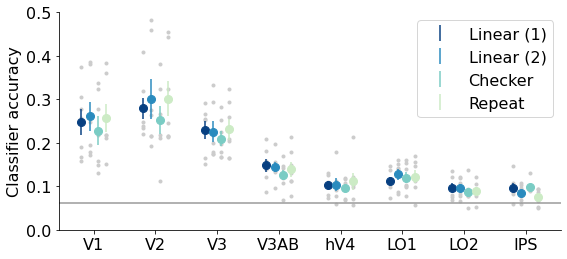

In [7]:
ti_plot = [0,1,2,3]

x_jitter = np.linspace(-0.2, 0.2, 4)

plt.figure(figsize=(9,4))

ax = plt.subplot(1,1,1)

plt.axhline(1/16, color=[0.6, 0.6, 0.6])

lh = []

for ti in ti_plot:

    x_ticks = np.arange(n_rois) + x_jitter[ti]

    vals = dec_withintask['acc_bytask'][:,:,ti]
    meanvals = np.mean(vals, axis=0)
    semvals = np.std(vals, axis=0)/np.sqrt(n_subjects-1)

    plt.plot(x_ticks, meanvals, 'o', color=task_colors[ti], markersize=8, zorder=10)
    h = plt.errorbar(x_ticks, meanvals, semvals, xerr=None, color=task_colors[ti], \
                     linestyle='none', zorder=10)
    lh.append(h)

    plt.plot(x_ticks, vals.T, '.', color=[0.8, 0.8, 0.8], zorder=-10)
    
plt.ylim([0, 0.5])

plt.xticks(np.arange(n_rois), roi_names)
plt.ylabel('Classifier accuracy')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(lh,np.array(task_names)[ti_plot])

# plt.title('16-way logistic regression classifier, overall acc')

figname = os.path.join(figfolder, 'multinomial_avg_alltasks.pdf')
plt.savefig(figname)

#### Accuracy versus c (regularization)

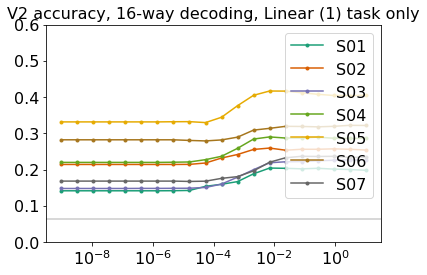

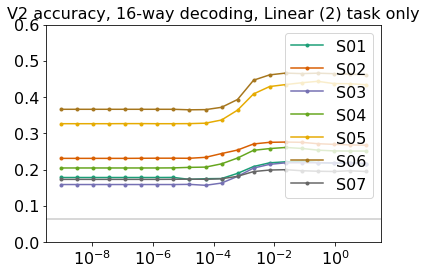

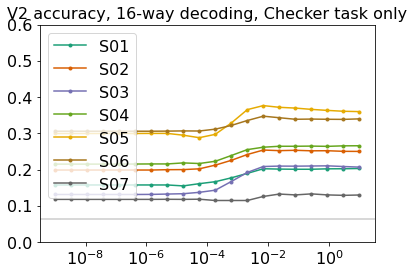

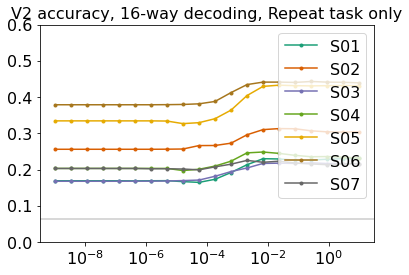

In [10]:
rr = 1;

c_values = np.logspace(-9, 1, 20)
# for rr in range(n_rois):
# for rr in [0,1,2,3]:
for ti in range(4):

    plt.figure()

    for si in range(n_subjects):

        vals = np.nanmean(dec_withintask['acc_each_cval'][si, rr, ti, :, :], axis=0)

        plt.plot(c_values, vals, '.-', color=subcolors[si,:], )

    plt.gca().set_xscale('log')
    plt.legend(['S%02d'%ss for ss in subjects])

    plt.ylim([0, 0.6])
    plt.axhline(1/16, color=[0.8, 0.8, 0.8])
    plt.title('%s accuracy, 16-way decoding, %s task only'%(roi_names[rr], task_names[ti]))